# Automating scheduling of dashboards via Looker API

In [3]:
from lookerapi.rest import ApiException
import lookerapi as looker
import config

# replace with your custom Looker API Host domain and port, if applicable.
base_url = 'https://hack.looker.com:19999/api/3.0/'
#Looker admins can create API3 credentials on Looker's **Admin/Users** page
client_id = config.client_id 
client_secret = config.client_secret 

# instantiate Auth API
unauthenticated_client = looker.ApiClient(base_url)
unauthenticated_authApi = looker.ApiAuthApi(unauthenticated_client)

# authenticate client
token = unauthenticated_authApi.login(client_id=client_id, client_secret=client_secret)
client = looker.ApiClient(base_url, 'Authorization', 'token ' + token.access_token)

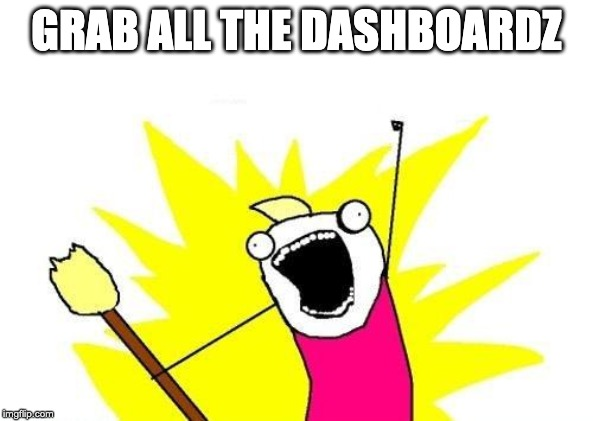

In [4]:
# create an instance of the Dashboard API class
api_instance = looker.DashboardApi(client)
fields = 'id,description,title' 

try:
    # Get All Dashboards
    api_response = api_instance.all_dashboards(fields=fields)
except ApiException as e:
    print("Exception when calling DashboardApi->all_dashboards: %s\n" % e)

In [5]:
len(api_response)

75

In [8]:
api_response[-20].id

'faa_redshift::airline_dashboard_atlantic_southeast_airlines'

# Now, schedule!

In [ ]:
scheduleApi = looker.ScheduledPlanApi(client)

In [ ]:
TO_EMAIL = 'nelson+looker@example.com'

In [ ]:
for response in api_response:
    print(f'Creating schedule for {response.id}')
    body={
    "name": f"{response.title} - monthly schedule",
    "user_id": 191,
    "run_as_recipient": False,
    "enabled": True,
    "lookml_dashboard_id": f"{response.id}",
    "require_results": False,
    "require_no_results": False,
    "require_change": False,
    "send_all_results": False,
    "crontab": "0 6 1 * *",
    "timezone": "America/Los_Angeles",
    "scheduled_plan_destination": [
      {
      "format": "assembled_pdf",
      "apply_formatting": True,
      "apply_vis": True,
      "address": TO,
      "type": "email"
      }
    ],
    "include_links": True,
    }
    # In this example, we simply run a schedule once:
    schedules = scheduleApi.scheduled_plan_run_once(body=body)